In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from problem import get_train_data,  get_test_data
sns.set(font_scale=1.0)

## Loading the data
We start by inspecting the training data

In [115]:
# Load train data
X_train , y_train = get_train_data()
X_train.shape , y_train.shape

((45351, 26), (45351,))

In [116]:
X_train.head()

,ID,Cycle,op_set_1,op_set_2,op_set_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


The data consist of 26 features :

* 1) Unit number or ID of the engine

* 2) Time in cycles

* 3) to 5) Operational settings 1 to 3

* 6) to 26) Sensor measurements 1 to 21

These measurements include various sensor response surfaces and operability margins :

* s1 : Total temperature at fan inlet
* s2: Total temperature at LPC outlet
* s3 : Total temperature at HPC (High-Pressure Compressor) outlet
* s4: Total temperature at LPT outlet
* s5: Pressure at fan inlet
* s6 : Total pressure in bypass-duct
* s7 :Total pressure at HPC outlet
* s8: Physical fan speed
* s9 :Physical core speed
* s10: Engine pressure ratio (P50/P2)
* s11: Static pressure at HPC outlet
* s12: Ratio of fuel flow to Ps30
* s13: Corrected fan speed
* s14: Corrected core speed
* s15: Bypass Ratio
* s16: Burner fuel-air ratio
* s17: Bleed Enthalpy
* s18: Demanded fan speed
* s19: Demanded corrected fan speed
* s20: HPT coolant bleed
* s21: LPT coolant bleed  



In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45351 entries, 0 to 45350
Data columns (total 26 columns):
ID          45351 non-null int64
Cycle       45351 non-null int64
op_set_1    45351 non-null float64
op_set_2    45351 non-null float64
op_set_3    45351 non-null float64
s1          45351 non-null float64
s2          45351 non-null float64
s3          45351 non-null float64
s4          45351 non-null float64
s5          45351 non-null float64
s6          45351 non-null float64
s7          45351 non-null float64
s8          45351 non-null float64
s9          45351 non-null float64
s10         45351 non-null float64
s11         45351 non-null float64
s12         45351 non-null float64
s13         45351 non-null float64
s14         45351 non-null float64
s15         45351 non-null float64
s16         45351 non-null float64
s17         45351 non-null int64
s18         45351 non-null int64
s19         45351 non-null float64
s20         45351 non-null float64
s21         45351 non-nu

In [118]:
X_train.describe()

,ID,Cycle,op_set_1,op_set_2,op_set_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,45351.000000,45351.000000,45351.000000,45351.000000,45351.0,45351.00,45351.000000,45351.000000,45351.000000,4.535100e+04,...,45351.000000,45351.000000,45351.000000,45351.000000,4.535100e+04,45351.000000,45351.0,45351.0,45351.000000,45351.000000
mean,104.447796,125.307049,-0.000017,0.000004,100.0,518.67,642.559339,1589.190970,1406.501317,1.462000e+01,...,522.305988,2388.082793,8143.998115,8.417088,3.000000e-02,392.859562,2388.0,100.0,38.910178,23.346022
std,56.544862,87.813757,0.002191,0.000294,0.0,0.00,0.524596,6.622906,9.687784,3.552753e-15,...,2.586206,0.127003,17.721758,0.056212,1.387794e-17,1.698605,0.0,0.0,0.236600,0.141834
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.872600
25%,57.000000,57.000000,-0.001500,-0.000200,100.0,518.67,642.180000,1584.570000,1399.250000,1.462000e+01,...,521.040000,2388.020000,8133.990000,8.386200,3.000000e-02,392.000000,2388.0,100.0,38.760000,23.254500
50%,108.000000,114.000000,0.000000,0.000000,100.0,518.67,642.520000,1588.800000,1405.510000,1.462000e+01,...,521.680000,2388.080000,8140.890000,8.421300,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.342400
75%,152.000000,174.000000,0.001500,0.000300,100.0,518.67,642.900000,1593.440000,1412.680000,1.462000e+01,...,522.400000,2388.140000,8148.810000,8.453500,3.000000e-02,394.000000,2388.0,100.0,39.050000,23.430100
max,200.000000,525.000000,0.008700,0.000700,100.0,518.67,645.110000,1616.910000,1441.490000,1.462000e+01,...,537.400000,2388.610000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.850000,23.950500


The target labels consist of 4 classes representing Time to Failure windows.

In [119]:
# The target labels
y_train.unique()

array([3, 2, 1, 0])

## EDA

In [120]:
def dataCleaning(Data): 
    
    """
    In order to have a proper visualisation, 
    some pre-exploration of the data has been done 
    leading to the following modifications
    """ 
       
    # Some features have all their values set to NaN in the correlation matrix, we simply drop them
    Data.drop(['s18', 's19','op_set_3'],axis=1, inplace=True)
    
    # Some feature have 0 correlation with target and the other features, we drop them too
    Data.drop(['op_set_1','op_set_2','s1','s5','s16'], axis=1,inplace=True)
    
    # Some features are highly correlated (>0.9), we drop one of them(s9,s14) (s8,s13) 
    Data.drop(['s12','s13','s14'], axis=1,inplace=True)
    
    return Data
    

In [84]:
X_train = dataCleaning(X_train)

### Distribution of all engines with regards to their failure cycles:

Text(0.5, 1.0, 'Distribution of engines with respect to their failure cycles')

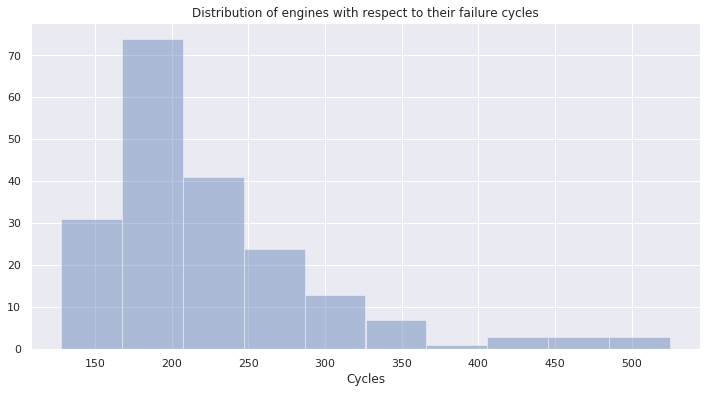

In [121]:
cycles_per_engine = pd.DataFrame(X_train.groupby('ID')['Cycle'].max())
cycles_per_engine.reset_index(level = 0 , inplace=True)
cycles_per_engine.columns = ['ID' , 'Cycles']
plt.figure(figsize=(12,6))
sns.distplot(cycles_per_engine.Cycles , bins= 10, kde=False)
plt.title("Distribution of engines with respect to their failure cycles")

In [36]:
pd.DataFrame(cycles_per_engine.Cycles).quantile(0.75)

Cycles    256.25
Name: 0.75, dtype: float64

$\rightarrow$ <b>We notice that : 75% of the engines fail before reaching 257 cycles.</b>

In [37]:
# We will concatenat X_train and y_train for visualisation purposes. 
y= pd.DataFrame(y_train)
X_conc= X_train
X_conc['labels']= y['labels'].values

### Number of observations per class 

Text(0.5, 1.0, 'Number of observation per class ')

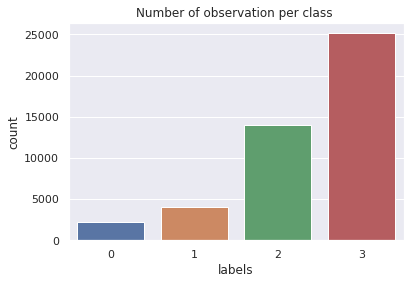

In [43]:
ax= sns.countplot(x='labels', data=X_conc)
plt.title("Number of observation per class ")

$\rightarrow$ <b>We notice that : The distribution between classes seems to be imbalanced.</b>

### Feature correlation matrix : 

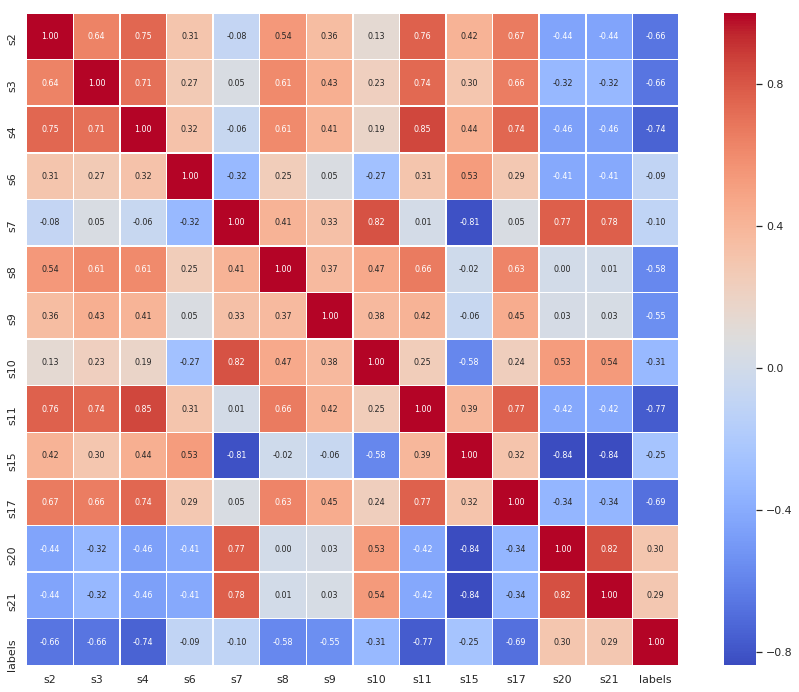

In [47]:
feature_corr = X_conc.iloc[:,2:].corr()
plt.figure(figsize=(16,12))
sns.heatmap(feature_corr,annot=True,square=True,fmt='.2f',annot_kws={'size':8}, cmap='coolwarm',linewidths=.5)
plt.show()

### Feature distributions : 

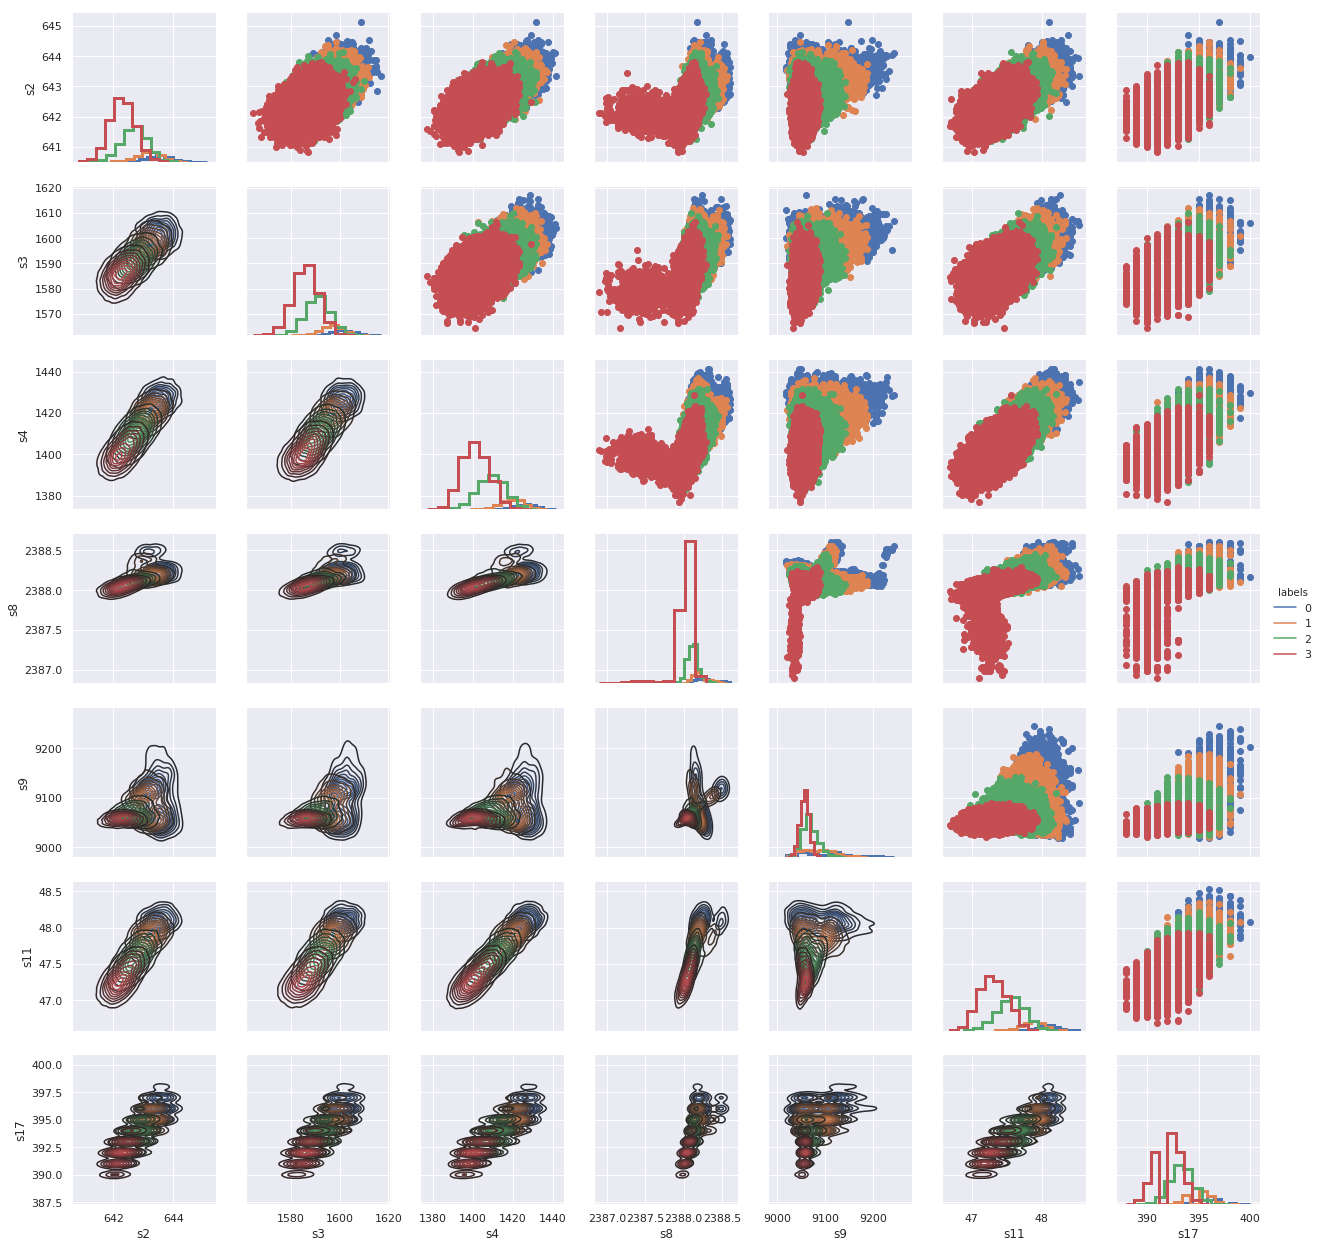

In [48]:
ft_to_pairplot=['s2','s3','s4','s8','s9','s11','s17','labels']
g = sns.PairGrid(X_conc[ft_to_pairplot], hue="labels", vars=ft_to_pairplot[:-1])
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g = g.add_legend()

$\rightarrow$ <b>Here we used a  pairplot to see the bivariate relation between each pair of features and distribution of each feature. We notice that:</b>
* Classes are not seperated across all feature combinations, there is an overlap in their pairwise relationships.

* Almost all features visualized above have normal distributions. 

### Relevant features inspection : 

In [49]:
def viz_func(eng_id,df): 
    
    """ Plot time series of a single engine.
    
        Args:
        eng_id (int64): The id of the engine considered.

    Returns:
        plots
        
    """
    subset=df[df.ID==eng_id]
    f = subset.Cycle.iloc[-1]
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12,14), sharex=True)
    
    print (" Features inspection for engine : "+str(eng_id))
    ## Tempreture at LPC : 
    axes[0].plot(subset.Cycle , subset.s2)
    axes[0].legend(['s2(°R)'])
    axes[0].set_title('Tempretures at LPC outlet')
    
    ## Tempreture at HPC : 
    axes[1].plot(subset.Cycle , subset.s3)
    axes[1].legend(['s3(°R)'])
    axes[1].set_title('Tempretures at HPC outlet')
    
    ## Tempreture at LPT : 
    axes[2].plot(subset.Cycle , subset.s4)
    axes[2].legend(['s4(°R)'])
    axes[2].set_title('Tempretures at LPT outlet')
    
    ## Static pressure at HPC outlet
    
    axes[3].plot(subset.Cycle , subset.s11)
    axes[3].legend(['s11(psia)'])
    axes[3].set_title('Static pressure at HPC outlet')
    
    ## Physical core speed
    
    axes[4].plot(subset.Cycle , subset.s9)
    axes[4].legend(['s9(rpm)'])
    axes[4].set_title('Physical core speed')
    
    ## Physical fan speed
    
    axes[5].plot(subset.Cycle , subset.s8)
    axes[5].legend(['s8(rpm)'])
    axes[5].set_title('Physical fan speed')
    
    ## HPT coolant bleed
    axes[6].plot(subset.Cycle , subset.s20)
    axes[6].legend(['s20(lbm/s)'])
    axes[6].set_title('HPT coolant bleed')
    
    for ax in axes:
        ax.axvline(f-10,color='r',label='ttf =10')
        ax.axvline(f-30,color='g',label='ttf =30')
        ax.axvline(f-100,color='k',label='ttf =100')
        
    plt.legend(loc=6)
    print('**************')
    return fig , axes

#### Visualize randomly chosen engines :

 Features inspection for engine : 72
**************
 Features inspection for engine : 181
**************
 Features inspection for engine : 80
**************


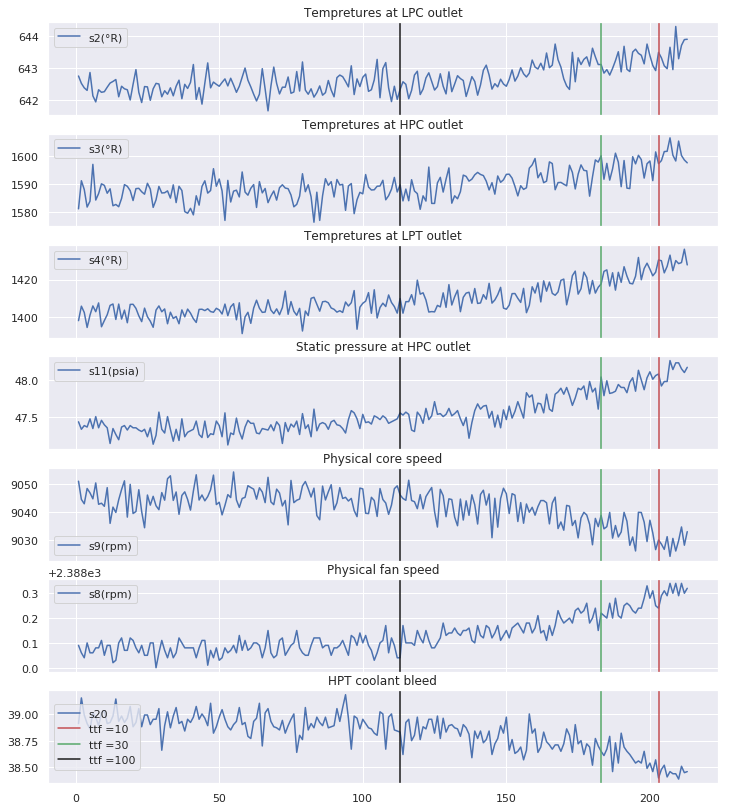

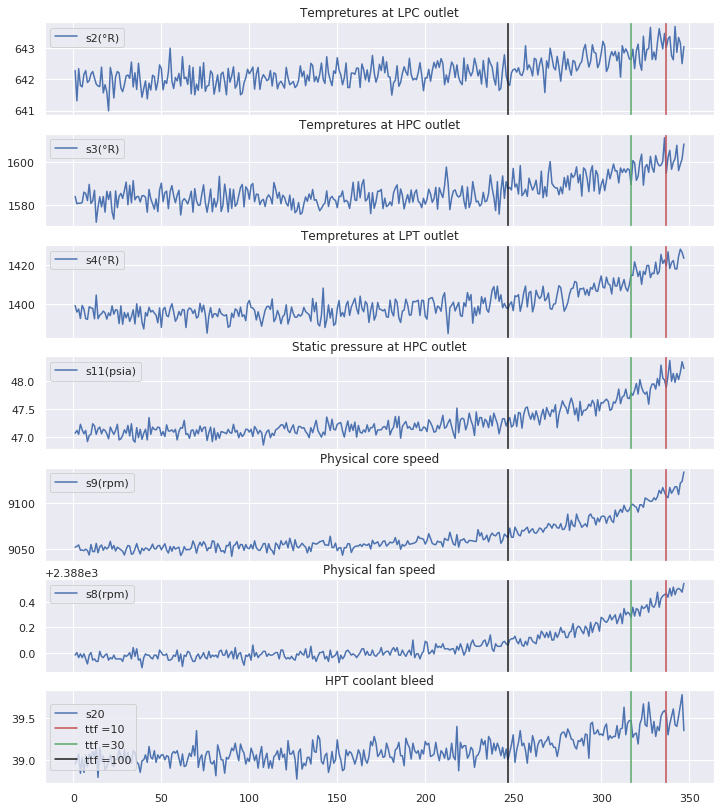

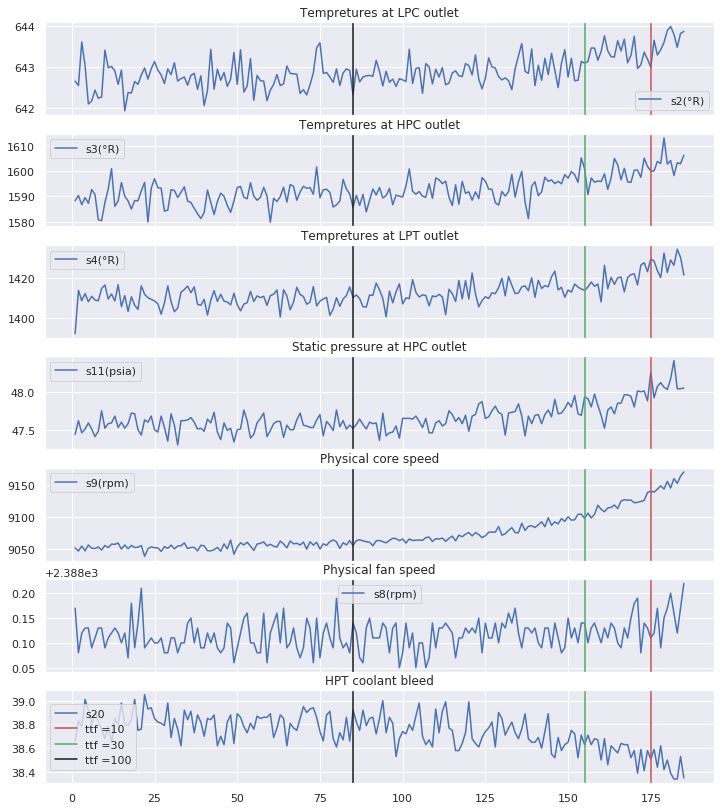

In [52]:
Engines = X_conc['ID'].unique()
eng_ids = np.random.choice(Engines, size=3)
for eng in eng_ids: 
    viz_func(eng,X_conc)
    

$\rightarrow$ <b>It is clear that the behaviour of sensors measurements differ from one class to another and especially when the number of cycles gets close to the failure point. These sensors measurements should then have been more explored in order to extract other valuable and informative information.</b>

### Classes caracteristics: 

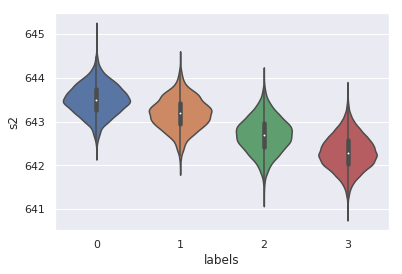

In [95]:
sns.violinplot(data=X_conc,x="labels", y="s2")

$\rightarrow$ <b>Even though our features' variances are quite low,these violinplots confirm the previous remark. </b>

## Feature extraction

In order to have more informative and insightful data, we are going to generate new features using simple smoothing of the sensors' measurements.  
Since the observations related to each engine could be considered as time series independent from the other engines' observations, the above functions will take that into consideration and apply rolling standard deviation (respectively mean) over a defined period of time (number of cycles) of a defined feature of a each engine seperately.

In [86]:
def rolling_std(data, feature, cycle_window, center=True):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (number of cycles) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling std from
    cycle_window : str
        string that defines the length of the cycle window passed to rolling
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    
    df_to_return = pd.DataFrame() 
    ids = data.ID.unique()
    name = '_'.join([feature, str(cycle_window), 'std'])
    for i in ids:
        sub_eng = data.loc[lambda df: df.ID == i, :]
        sub_eng.loc[:,name] = sub_eng[feature].rolling(cycle_window , center=center).std()
        sub_eng.loc[:,name] = sub_eng[name].ffill().bfill()
        sub_eng.loc[:,name] = sub_eng[name].astype(sub_eng[feature].dtype)
        df_to_return = pd.concat([df_to_return , sub_eng], axis=0)
    return df_to_return

In [90]:
def rolling_mean(data, feature, cycle_window, center=False):
    """
    For a given dataframe, compute the mean over
    a defined period of time (number of cycles) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    cycle_window : str
        string that defines the length of the cycle window passed to rolling
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    
    df_to_return = pd.DataFrame()
    ids = data.ID.unique()
    name = '_'.join([feature, str(cycle_window), 'mean'])
    for i in ids:
        sub_eng = data.loc[lambda df: df.ID == i, :]
        sub_eng.loc[:,name] = sub_eng[feature].rolling(cycle_window, win_type = 'hamming' , center=center).mean()
        sub_eng.loc[:,name] = sub_eng[name].ffill().bfill()
        sub_eng.loc[:,name] = sub_eng[name].astype(sub_eng[feature].dtype)
        df_to_return = pd.concat([df_to_return , sub_eng], axis=0)
    return df_to_return

In [88]:
X_train=rolling_std(X_train,'s11',10)

In [92]:
X_train=rolling_mean(X_train,'s11',10)

## Model building 

In order to evaluate the performance of the submissions, we provide a test set that can be loaded similarly as follows:

In [127]:
X_test , y_test = get_test_data()
X_test.shape , y_test.shape

((29692, 26), (29692,))

In [141]:
X_test =  X_test.sample(frac=1).reset_index(drop=True)

In [102]:
## apply same modifications on X_test : 
X_test=dataCleaning(X_test)
X_test=rolling_mean(X_test,'s11',10)
X_test=rolling_std(X_test,'s11',10)

### Random forest classifier :

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score , classification_report
accuracy_score(y_test, y_pred)

0.6394651758049307

In [139]:
confusion_matrix(y_test,y_pred)

array([[    0,     1,     6,    28],
       [    1,     4,   126,   457],
       [   13,    94,  1334,  4437],
       [   34,   407,  5101, 17649]])

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.01      0.01      0.01       588
           2       0.20      0.23      0.21      5878
           3       0.78      0.76      0.77     23191

   micro avg       0.64      0.64      0.64     29692
   macro avg       0.25      0.25      0.25     29692
weighted avg       0.65      0.64      0.65     29692

